<a href="https://colab.research.google.com/github/wamz101/Anomaly-Detection/blob/main/Anomaly_Detection_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anomaly Detection Using
<br>
1.) Isolation Trees <br>
2.) One Class SVM <br>
3.) Local Outlier Factors <br>
4.) Minimum Covariance Determinant

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Isolation Trees

In [ ]:
df = pd.read_csv('/content/banknotes.csv')

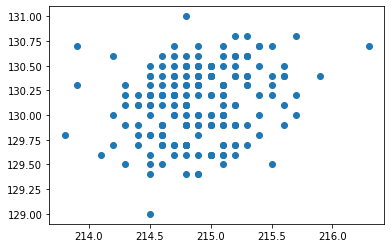

In [ ]:
plt.scatter(df['Length'], df['Left'])

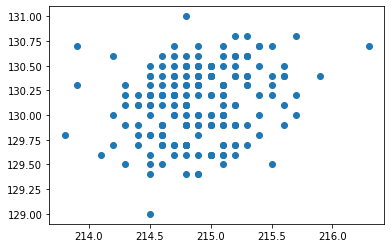

In [ ]:
x1 = df['Length']
x2 = df['Left']
y = df['conterfeit']
x = np.array(list(zip(x1,x2)))
plt.scatter(x[:,0], x[:,1])

Based on the data above we will make an anomaly detection model using isolation trees algorithm. As we can see there are many outliers in the above dataset

In [ ]:
from sklearn.ensemble import IsolationForest
model = IsolationForest()

In [ ]:
model.fit(x)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [ ]:
pred = model.fit_predict(x)


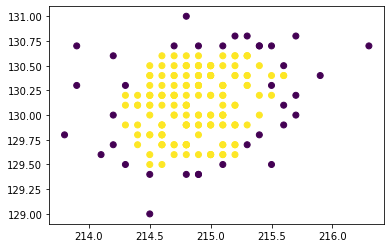

In [ ]:
plt.scatter(x[:,0], x[:,1], c=pred)

In [ ]:
model.predict([[200,130]])

array([-1])

In [ ]:
model.predict([[215,130]])

array([1])

# One Class SVM

In [ ]:
from sklearn.svm import OneClassSVM
model2 = OneClassSVM(nu=0.05, gamma=0.001)
model2.fit(x)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.001, kernel='rbf',
            max_iter=-1, nu=0.05, shrinking=True, tol=0.001, verbose=False)

In [ ]:
pred2 = model2.fit_predict(x)

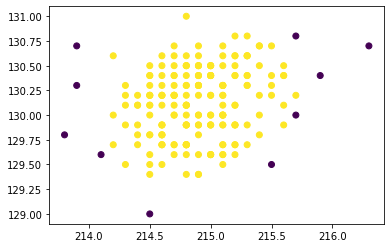

In [ ]:
plt.scatter(x[:,0], x[:,1], c=pred2)

# Multivariate

In [ ]:
from sklearn.covariance import EllipticEnvelope
model3 = EllipticEnvelope()
model3.fit(x)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
                 store_precision=True, support_fraction=None)

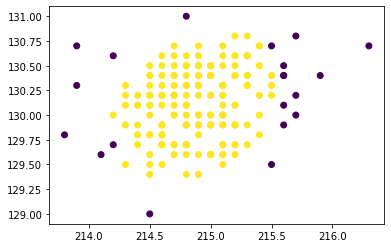

In [ ]:
pred3 = model3.predict(x)
plt.scatter(x[:,0], x[:,1], c=pred3)

# Local Outlier Factor

In [ ]:
from sklearn.neighbors import LocalOutlierFactor as lof
model4 = lof(n_neighbors=20)
pred4 = model4.fit_predict(x)

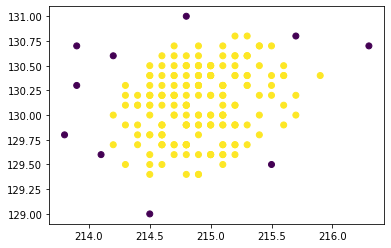

In [ ]:
plt.scatter(x[:,0], x[:,1], c=pred4)